# Training and Testing Data (ข้อมูลชุดเรียนรู้ และข้อมูลชุดทดสอบ)

ในกระบวนการของการเรียนรู้เครื่องจักรจะต้องแบ่งข้อมูลออกเป็นสองส่วน ประกอบด้วย ข้อมูลชุดเรียนรู้ (Training set) และข้อมูลชุดทดสอบ (Testing set) ซึ่งข้อมูลชุดเรียนรู้จะถูกนำไปเรียนรู้ด้วยวิธีการเรียนรู้เครื่องจักรเพื่อสร้างออกมาเป็นโมเดล (Model) จากนั้นจึงทดสอบโมเดลที่สร้างด้วยข้อมูลชุดทดสอบ หากโมเดลที่สร้างมีประสิทธิภาพดี จึงจะนำโมเดลนั้นไปใช้งานจริง

ใน scikit-learn มีเครื่องมือที่ช่วยในการแบ่งข้อมูล และสลับข้อมูล (Shuffle) สามารถทำได้ดังนี้

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Loading iris dataset
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [19]:
# split and shuffle data
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], \
                                                    random_state=0)

จากตัวอย่างข้างต้น ผลลัพธ์ของฟังก์ชัน __train_test_split__ คือ X_train, X_test, y_train, y_test ซึ่งมีประเภทข้อมูลคือ numpy โดยตัวแปร X_train และ y_train จะมีข้อมูลอยู่จำนวน 75% และตัวแปร X_test และ y_test จะมีข้อมูลอยู่จำนวน 25% จากข้อมูลทั้งหมด


In [12]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### หากต้องการกำหนดขนาดของข้อมูลเองสามารถทำได้โดยใช้ keyword __test_size__

In [23]:
# กำหนดให้ test set มีจำนวนข้อมูล 50% จากข้อมูลทั้งหมด
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], \
                                                    test_size=0.5, random_state=0)

In [25]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}\n".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (75, 4)
y_train shape: (75,)

X_test shape: (75, 4)
y_test shape: (75,)


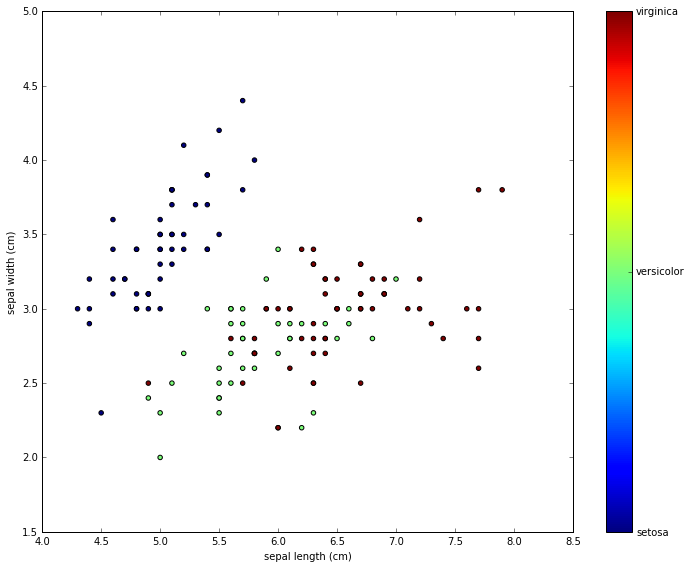

In [32]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_dataset.target_names[int(i)])

plt.figure(figsize=(10, 8))
plt.scatter(iris_dataset.data[:, x_index], iris_dataset.data[:, y_index], c=iris_dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_dataset.feature_names[x_index])
plt.ylabel(iris_dataset.feature_names[y_index])

plt.tight_layout()
plt.show()


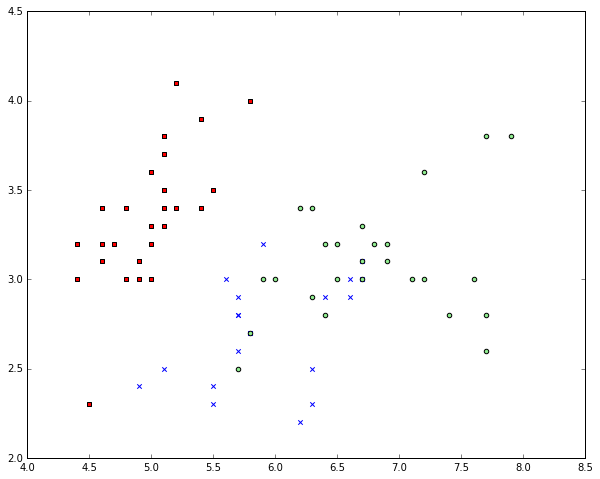

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
plt.figure(figsize=(10, 8))

for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

## ติดตั้งเครื่องมือ mglearn (install mglearn tool)

```
การติดตั้ง mglearn ผ่าน Terminal ทำได้โดย  

pip install mglearn

หากต้องการติดตั้งผ่าน Jupyter Notebook ทำได้โดย

!pip install mglearn

```

In [43]:
! pip install mglearn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


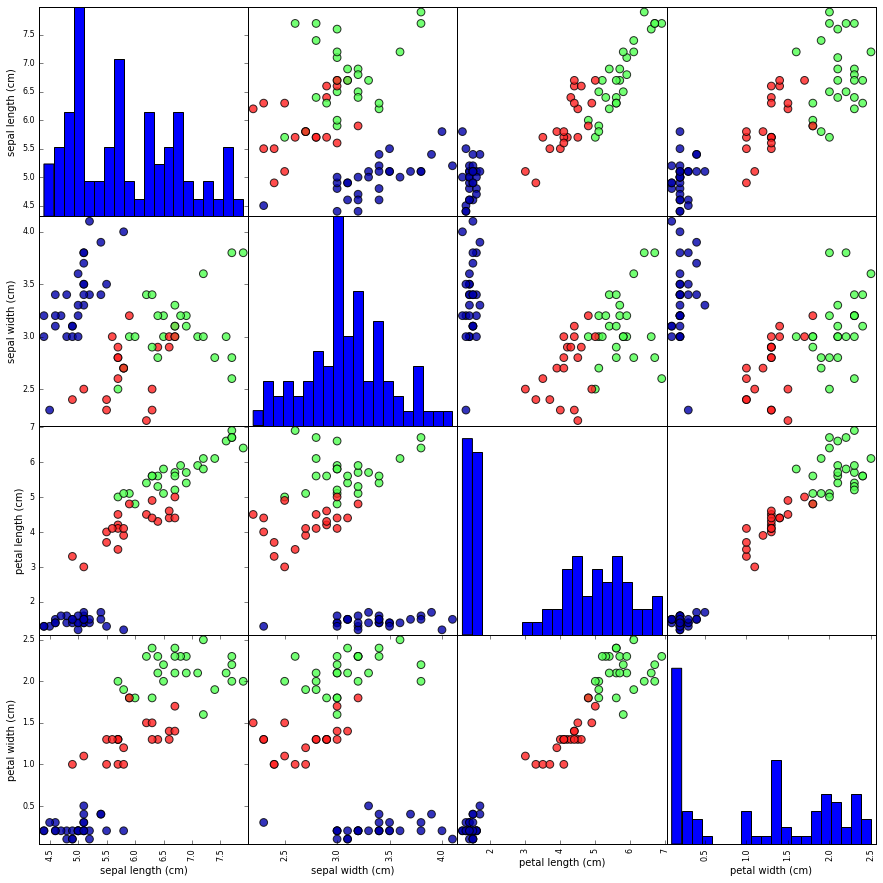

In [42]:
import pandas as pd
import mglearn

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)